In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from support.hyperphoto import HyperPhoto
from support.plots import show_k, plot_cluster_means
from support.functions import kmeans

In [2]:


# פרמטרים מה-header
width = 800  # עמודות (x)
height = 280  # שורות (y)
bands = 126  # ערוצים (z)

shape = (height, width, bands)

source_path = r'C:\Users\ronsh\Desktop\big_data_for_projects\self_test_rad.img'
dtype = np.int16  # data type = 2
# פרמטרים לניתוח גרפים
range_ = (-200, 400)
bins = 100
target_path = "../data/t.pt"
p = 0.01



In [8]:
from support.hyperphoto import HyperPhoto

shape = (height,width, bands)
H,W,B = shape
hyperPhoto = HyperPhoto(source_path, shape, np.int16)
cube = hyperPhoto.data.numpy()


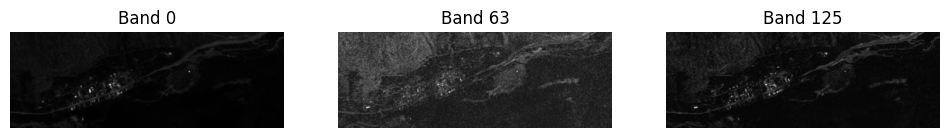

In [9]:
bands_to_show = [0, B//2, B-1]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, b in zip(axes, bands_to_show):
    ax.imshow(cube[:, :, b], cmap='gray')
    ax.set_title(f'Band {b}')
    ax.axis('off')

plt.show()


In [10]:
from sklearn.decomposition import PCA

# reshape to (pixels, bands)
X = cube.reshape(-1, B). astype(np.float32)

# PCA to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# reshape back to image
rgb = X_pca.reshape(H, W, 3)


In [11]:
def normalize(img):
    img = img - img.min()
    img = img / img.max()
    return img

rgb = normalize(rgb)

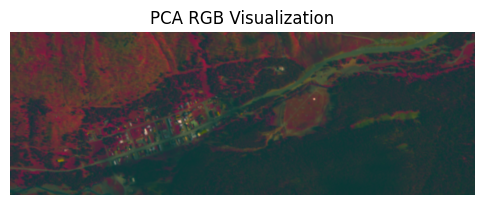

In [12]:
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title('PCA RGB Visualization')
plt.axis('off')
plt.show()


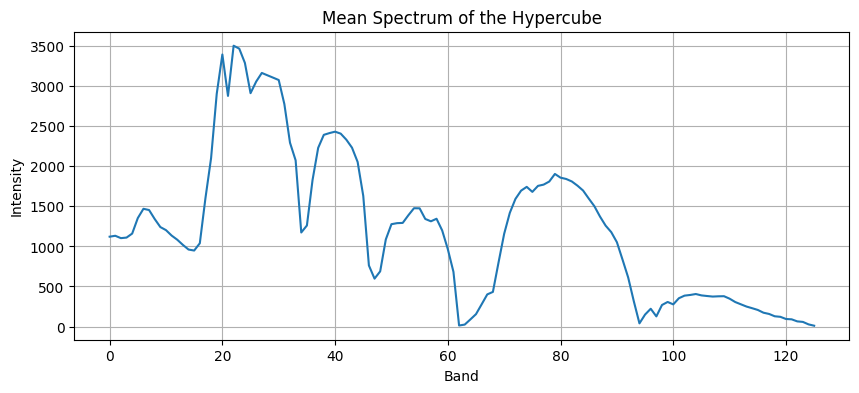

In [13]:
mean_spectrum = cube.mean(axis=(0,1))

plt.figure(figsize=(10,4))
plt.plot(mean_spectrum)
plt.title('Mean Spectrum of the Hypercube')
plt.xlabel('Band')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()


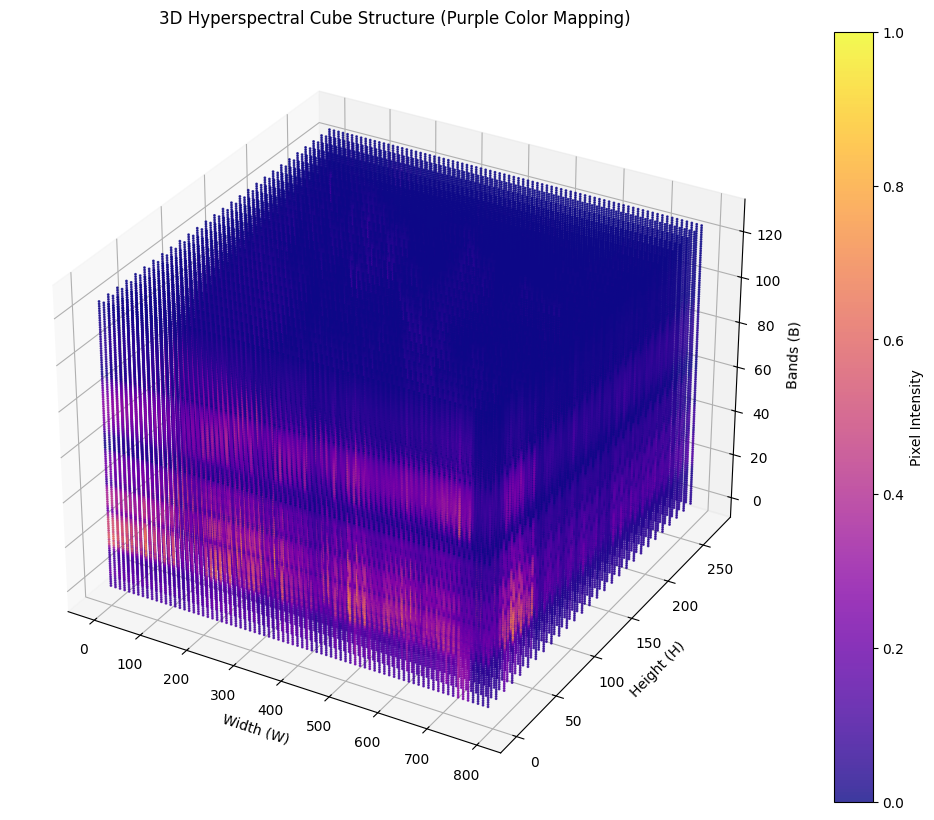

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

H, W, B = cube.shape

factor_h = 10
factor_w = 10

yy, xx, zz = np.meshgrid(
    np.arange(0, H, factor_h),
    np.arange(0, W, factor_w),
    np.arange(0, B),
    indexing='ij'
)

yy = yy.flatten()
xx = xx.flatten()
zz = zz.flatten()

# ערכי פיקסלים אמיתיים
values = cube[yy, xx, zz]

# נורמליזציה לצבעים
vmin, vmax = values.min(), values.max()
values_norm = (values - vmin) / (vmax - vmin)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(xx, yy, zz, c=values_norm, cmap='plasma', s=1, alpha=0.8)

ax.set_xlabel('Width (W)')
ax.set_ylabel('Height (H)')
ax.set_zlabel('Bands (B)')
ax.set_title('3D Hyperspectral Cube Structure (Purple Color Mapping)')

plt.colorbar(scatter, ax=ax, label='Pixel Intensity')
plt.show()
